# Assignment 16-1
In this assignment students have to compress racoon grey scale image into 5 clusters.
In the end, visualize both raw and compressed image and look for quality difference.
The raw image is available in spicy.misc package with the name face.

In [1]:
#Import the packages
import numpy as np
import sklearn.cluster as cls
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

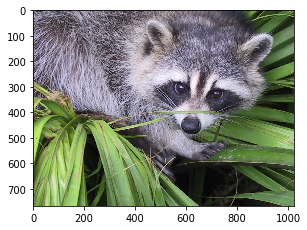

In [2]:
# Original Image
face = scipy.misc.face(gray=False)
plt.figure(figsize=(10, 3.6))
plt.imshow(face)

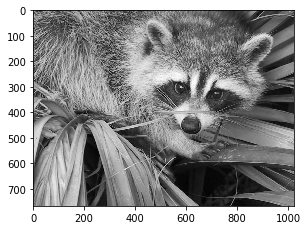

In [3]:
# Grayscale Image
face_gray = scipy.misc.face(gray=True)
plt.figure(figsize=(10, 3.6))
plt.imshow(face_gray, cmap=plt.cm.gray)

In [4]:
face_gray.shape

(768, 1024)

In [5]:
#Convert the grayscale image into 1-D array
fg_array=face_gray.reshape(768*1024,1)
fg_array

array([[114],
       [130],
       [145],
       ...,
       [142],
       [141],
       [140]], dtype=uint8)

In [6]:
#Cluster the array datapoints into 5 cluster using KMeans
km = cls.KMeans(n_clusters=5)
km.fit(fg_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
km.cluster_centers_

array([[ 72.97293392],
       [151.23100509],
       [112.11564253],
       [193.5128744 ],
       [ 26.59547247]])

In [8]:
km.labels_

array([2, 2, 1, ..., 1, 1, 1])

In [9]:
km.labels_.shape

(786432,)

In [10]:
#Convert the KMeans clusters and labels as array of 768*1024 to bring into image phase

clusters = np.asarray(km.cluster_centers_) 
labels = np.asarray(km.labels_)
labels

array([2, 2, 1, ..., 1, 1, 1])

In [11]:
labels = labels.reshape(768,1024)
labels

array([[2, 2, 1, ..., 2, 2, 1],
       [0, 2, 2, ..., 2, 1, 1],
       [0, 0, 2, ..., 2, 1, 1],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]])

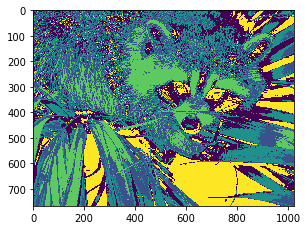

In [12]:
plt.imsave('compressed_racoon.png',labels)
fg_comp = plt.imread('compressed_racoon.png')
plt.figure(figsize=(10, 3.6))
plt.imshow(fg_comp)

## Above shows that using 5 clusters, we have shaded different shades with different colours.